# An√°lise explorat√≥ria dos dados
_EDA - Exploratory Data Analysis_

---

## Sum√°rio

1. **Importa√ß√£o de bibliotecas**
2. **Carregamento da base**
3. **An√°lise do dataframe**
   - 3.1. Volumetria
   - 3.2. Tipagem, Nulos e Cardinalidade
   - 3.3. Duplicidade
   - 3.4. Medidas Estat√≠sticas
   - 3.5. Boxplot e Outliers das Vari√°veis Num√©ricas
   - 3.6. Distribui√ß√£o das Vari√°veis Num√©ricas
   - 3.7. An√°lise da Distribui√ß√£o das Vari√°veis Num√©ricas
4. **An√°lise explorat√≥ria dos dados**
   - 4.1. An√°lise demogr√°fica
      - 4.1.1. Qual a distribui√ß√£o da idade dos clientes?
      - 4.1.2. O g√™nero dos clientes est√° balanceado?
      - 4.1.3. H√° diferen√ßa de idade m√©dia entre g√™neros?
      - 4.1.4. O valor m√©dio de compra difere entre g√™neros?
      - 4.1.5. Idade influencia o valor do carro comprado?
      - 4.1.6. Existe uma faixa et√°ria que tende a gastar mais?
   - 4.2. An√°lise financeira
      - 4.2.1. Como √© a distribui√ß√£o da renda anual?
      - 4.2.2. Qual a rela√ß√£o de entre renda e valor de compra?
      - 4.2.3. Clientes com mais d√≠vida compram carros mais caros?
      - 4.2.4. O patrim√¥nio l√≠quido tem rela√ß√£o com o valor de compra?
      - 4.2.5. Renda, d√≠vida e patrim√¥nio s√£o correlacionados entre si?
5. **Insights e recomenda√ß√µes**

<br>

---

<br>

## 1. Importa√ß√£o de bibliotecas

In [1]:
# Importa√ß√£o de pacotes e defini√ß√£o de par√¢metros globais

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import textwrap
import warnings
import gc

from scipy import stats
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Configura√ß√µes para exibi√ß√£o de dados no Jupyter Notebook

# Configurar op√ß√£o para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conte√∫do completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supress√£o de mensagens de aviso durante a execu√ß√£o
warnings.filterwarnings('ignore')

# Configurar estilo dos gr√°ficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento da base

In [3]:
# Efetuando a limpeza da mem√≥ria antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da mem√≥ria: {gc.collect()}')


Quantidade de objetos removidos da mem√≥ria: 0


In [4]:
# Criando um dataframe a partir do aquivo .csv
df = pd.read_csv('dados/Car_Purchasing_Data.csv', sep=',')
df.head()

Customer Name  \
0    Martina Avila   
1    Harlan Barnes   
2  Naomi Rodriquez   
3  Jade Cunningham   
4     Cedric Leach   

                                              Customer e-mail Country  Gender  \
0           cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA       0   
1                                         eu.dolor@diam.co.uk     USA       0   
2  vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk     USA       1   
3                                     malesuada@dignissim.com     USA       1   
4              felis.ullamcorper.viverra@egetmollislectus.net     USA       1   

   Age  Annual Salary  Credit Card Debt    Net Worth  Car Purchase Amount  
0   42    62812.09301      11609.380910  238961.2505          35321.45877  
1   41    66646.89292       9572.957136  530973.9078          45115.52566  
2   43    53798.55112      11160.355060  638467.1773          42925.70921  
3   58    79370.03798      14426.164850  548599.0524          67422.36313  
4   57    59729.15130       5358.712177  560304.0671          55915.46248

## 3. An√°lise do dataframe

### 3.1. Volumetria

In [5]:
# Exibindo a quantidade de linhas e coluna do dataframe

print(f'Quantidade de linhas (registros):  {df.shape[0]}')
print(f'Quantidade de colunas (vari√°veis): {df.shape[1]}')    

Quantidade de linhas (registros):  500
Quantidade de colunas (vari√°veis): 9


### 3.2. Tipagem, Nulos e Cardinalidade

In [6]:
def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados ser√£o gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Vari√°vel': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [7]:
# Exibindo os metadados do dataframe

gerar_metadados(df)

Vari√°vel     Tipo  Qtde de nulos  % de nulos  Cardinalidade
0        Customer Name   object              0         0.0            498
1      Customer e-mail   object              0         0.0            500
2              Country   object              0         0.0              1
3               Gender    int64              0         0.0              2
4                  Age    int64              0         0.0             43
5        Annual Salary  float64              0         0.0            500
6     Credit Card Debt  float64              0         0.0            500
7            Net Worth  float64              0         0.0            500
8  Car Purchase Amount  float64              0         0.0            500

### 3.3. Duplicidade

In [8]:
# Exibindo a quantidade de registros √∫nicos e duplicados

contagem_duplicatas = df.duplicated().value_counts().rename(
    index={False: 'Registros √∫nicos', True: 'Registros duplicados'})
print(contagem_duplicatas)


Registros √∫nicos    500
Name: count, dtype: int64


### 3.4. Medidas Estat√≠sticas

In [9]:
df.describe().T

count           mean            std      min  \
Gender               500.0       0.506000       0.500465      0.0   
Age                  500.0      46.224000       7.990339     20.0   
Annual Salary        500.0   62127.239608   11703.378228  20000.0   
Credit Card Debt     500.0    9607.645049    3489.187973    100.0   
Net Worth            500.0  431475.713625  173536.756340  20000.0   
Car Purchase Amount  500.0   44209.799218   10773.178744   9000.0   

                               25%            50%            75%        max  
Gender                    0.000000       1.000000       1.000000        1.0  
Age                      41.000000      46.000000      52.000000       70.0  
Annual Salary         54391.977195   62915.497035   70117.862005   100000.0  
Credit Card Debt       7397.515792    9655.035568   11798.867487    20000.0  
Net Worth            299824.195900  426750.120650  557324.478725  1000000.0  
Car Purchase Amount   37629.896040   43997.783390   51254.709517    80000.0

In [10]:
df.describe(exclude=('float','int')).T

count unique  \
Customer Name     500    498   
Customer e-mail   500    500   
Country           500      1   

                                                               top freq  
Customer Name                                                 Seth    2  
Customer e-mail  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu    1  
Country                                                        USA  500

### 3.5. Boxplot e Outliers das Vari√°veis Num√©ricas

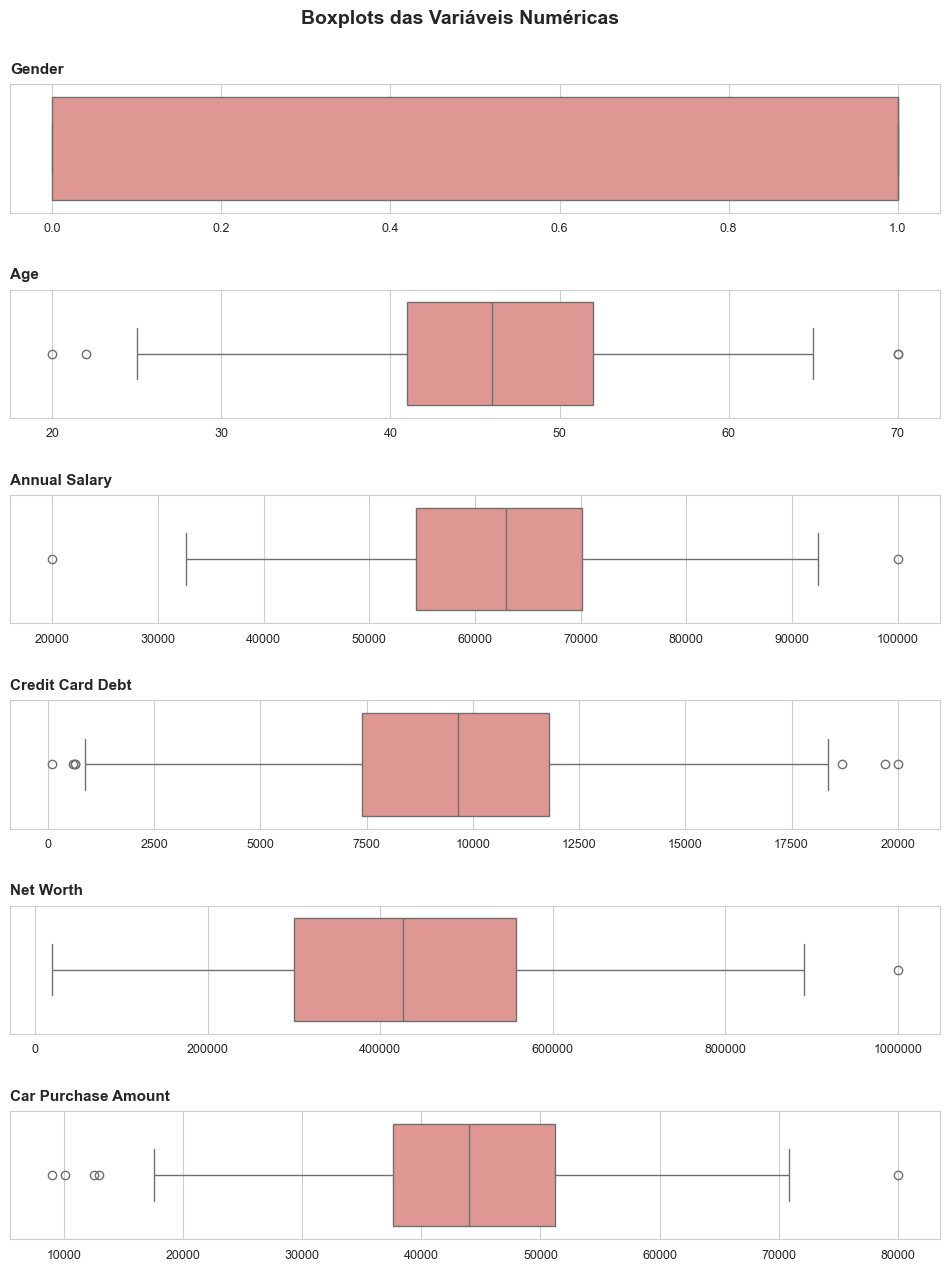

In [11]:
# Seleciona os nomes das colunas num√©ricas (float apenas)
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Verifica se h√° colunas num√©ricas
if not colunas_numericas:
    print('Nenhuma vari√°vel num√©rica encontrada no DataFrame.')
else:
    # N√∫mero de boxplots a serem gerados
    n_plots = len(colunas_numericas)

    # Cria a figura com subplots verticais
    fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2.5 * n_plots), 
                            gridspec_kw={'hspace': 0.6})

    # Garante que axs seja sempre uma lista (mesmo com 1 gr√°fico)
    if n_plots == 1:
        axs = [axs]

    # Loop pelas colunas para criar os boxplots
    for ax, col in zip(axs, colunas_numericas):
        sns.boxplot(x=df[col], ax=ax, color='#ea8c87', orient='h')
        ax.set_title(f'{col}', loc='left', fontsize=11, pad=8, fontweight='bold')
        ax.set(xlabel='', ylabel='')
        ax.tick_params(labelsize=9)
        ax.ticklabel_format(style='plain', axis='x')

    # Ajusta o layout e adiciona t√≠tulo geral
    fig.suptitle('Boxplots das Vari√°veis Num√©ricas', fontsize=14, fontweight='bold', y=0.93)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # evita sobreposi√ß√£o com t√≠tulo
    plt.show()


In [12]:
# Seleciona as vari√°veis num√©ricas
colunas_numericas = df.select_dtypes(include=['number'])

# Lista para armazenar as informa√ß√µes de outliers por coluna
resultados_outliers = []

for col in colunas_numericas:
    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Contagem de outliers abaixo e acima dos limites
    outliers_abaixo = (df[col] < limite_inferior).sum()
    outliers_acima = (df[col] > limite_superior).sum()
    
    # Calcula a quantidade total de outliers fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de outliers fora dos limites
    total_outliers_perc = total_outliers / df.shape[0]
    
    # Armazena resultados em um dicion√°rio
    resultados_outliers.append({
        'Vari√°vel': col,
        'IIQ': IIQ,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total Outliers': total_outliers,
        '% Outliers': round(total_outliers_perc * 100, 3)
    })
    
# Converte a lista de dicion√°rios em um DataFrame
df_outliers = pd.DataFrame(resultados_outliers) 

# Ordena o DataFrame pela % de outliers em ordem decrescente
df_outliers.sort_values(by='% Outliers', ascending=False, inplace=True)  

# Exibe o DataFrame com os resultados
print('\nResumo dos Outliers por Vari√°vel (ordenado por maior %)')
display(df_outliers.reset_index(drop=True))


Resumo dos Outliers por Vari√°vel (ordenado por maior %)


Vari√°vel            IIQ  Limite Inferior  Limite Superior  \
0     Credit Card Debt    4401.351696       795.488248     18400.895031   
1  Car Purchase Amount   13624.813477     17192.675824     71691.929734   
2                  Age      11.000000        24.500000        68.500000   
3        Annual Salary   15725.884810     30803.149980     93706.689220   
4            Net Worth  257500.282825    -86426.228337    943574.902962   
5               Gender       1.000000        -1.500000         2.500000   

   Outliers Abaixo  Outliers Acima  Total Outliers  % Outliers  
0                4               3               7         1.4  
1                4               1               5         1.0  
2                2               2               4         0.8  
3                1               1               2         0.4  
4                0               1               1         0.2  
5                0               0               0         0.0

Os boxplots permitem observar a distribui√ß√£o, dispers√£o e presen√ßa de outliers nas vari√°veis num√©ricas do dataset.

- **Gender**: vari√°vel bin√°ria (0 e 1), sem dispers√£o nem outliers, como esperado para vari√°vel categ√≥rica codificada.
- **Age**: apresenta distribui√ß√£o relativamente sim√©trica, com poucos outliers abaixo de 25 e acima de 68 anos, representando casos isolados de clientes mais jovens ou mais velhos.
- **Annual Salary**: concentrada aproximadamente entre 33.000 e 93.000, com apenas dois outliers (um abaixo e um acima). Indica consist√™ncia salarial entre clientes, sem grandes extremos.
- **Credit Card Debt**: leve assimetria √† direita, com 7 outliers (1,4%) em valores muito baixos e muito altos, indicando alguns clientes com d√≠vidas excepcionalmente baixas ou altas.
- **Net Worth**: ampla varia√ß√£o de patrim√¥nio l√≠quido, variando de zero a quase 1 milh√£o sendo este o outlier acima do limite superior. Mostra que h√° clientes de perfis financeiros muito distintos.
- **Car Purchase Amount**: distribui√ß√£o equilibrada, com poucos outliers (1%), principalmente compras muito baixas, representando clientes de menor poder aquisitivo.

A presen√ßa de outliers √© baixa em todas as vari√°veis (‚â§ 1,4%), o que indica boa qualidade dos dados e baixa necessidade de tratamento extremo.
Os poucos outliers identificados podem representar casos reais de comportamento at√≠pico, e devem ser analisados com cautela antes de qualquer remo√ß√£o, especialmente se tiverem relev√¢ncia de neg√≥cio, por exemplo, clientes premium ou endividados.

### 3.6. Distribui√ß√£o das Vari√°veis Num√©ricas

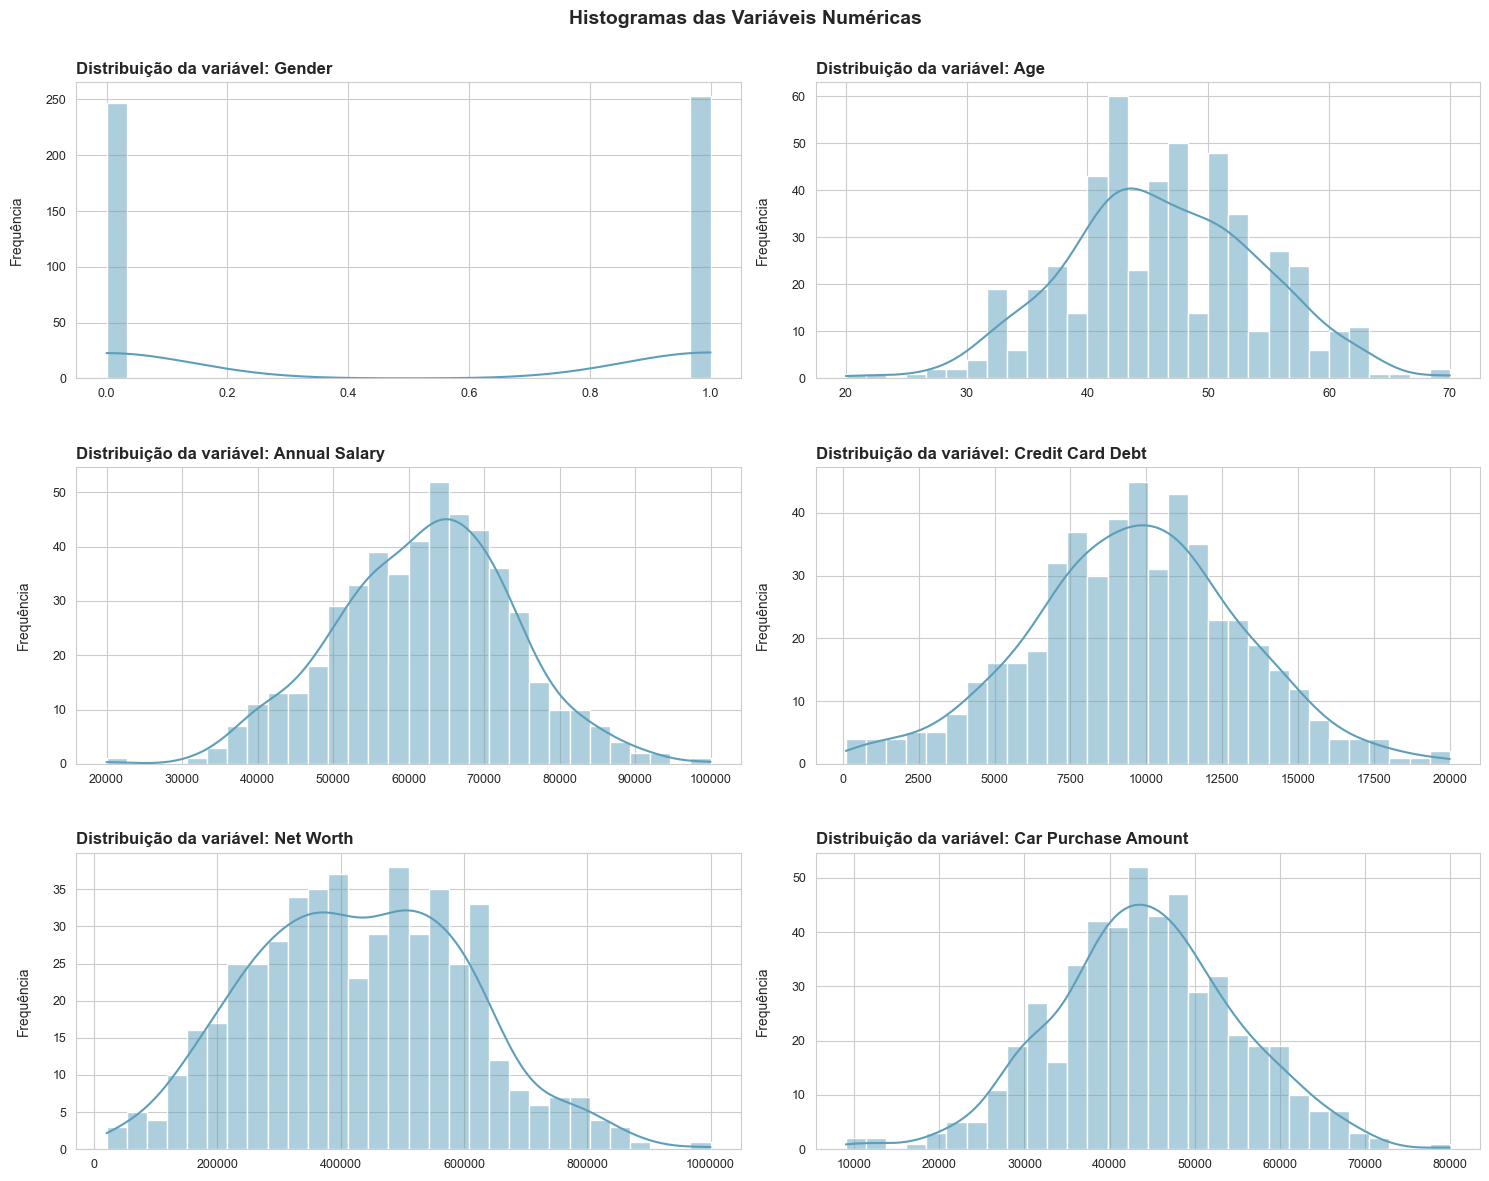

In [13]:
# Seleciona as vari√°veis num√©ricas
colunas_numericas = df.select_dtypes(include=['float', 'int']).columns

# Calcula a quantidade de subplots necess√°rios
qtde_subplots = len(colunas_numericas)

# Configura√ß√£o para m√∫ltiplos gr√°ficos: 2 colunas por linha
colunas_subplot = 2
qtde_linhas = -(-qtde_subplots // colunas_subplot)

# Cria√ß√£o da figura com subplots
fig, axs = plt.subplots(qtde_linhas, colunas_subplot, figsize=(15, 4 * qtde_linhas))

# Transforma√ß√£o do array de subplots para facilitar o loop
axs = axs.flatten()

# Remove subplots vazios, caso existam
for i in range(qtde_subplots, len(axs)):
    fig.delaxes(axs[i])

# Loop sobre as vari√°veis num√©ricas para criar os histogramas
for i, coluna in enumerate(colunas_numericas):
    sns.histplot(data=df, x=coluna, ax=axs[i], bins=30, kde=True, color='#5d9eba', edgecolor='#ffffff')

    # Configura o t√≠tulo e remove os r√≥tulos dos eixos
    axs[i].set_title(f'Distribui√ß√£o da vari√°vel: {coluna}', fontsize=12, loc='left', fontweight='bold')
    axs[i].set(xlabel='', ylabel='Frequ√™ncia\n')

    # Ajusta o tamanho dos r√≥tulos
    axs[i].tick_params(labelsize=9)

    # Exibe r√≥tulos sem nota√ß√£o cient√≠fica
    axs[i].ticklabel_format(style='plain', axis='x')

# Adiciona um t√≠tulo geral
fig.suptitle('Histogramas das Vari√°veis Num√©ricas', fontsize=14, fontweight='bold')

# Ajusta o layout para evitar sobreposi√ß√£o
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, top=0.92)  # Mais espa√ßo entre os gr√°ficos
plt.show()

Os histogramas permitem observar a forma da distribui√ß√£o e poss√≠veis padr√µes de concentra√ß√£o dos dados.

- **Gender**: vari√°vel bin√°ria, com frequ√™ncia equilibrada entre 0 e 1, indicando propor√ß√£o semelhante entre homens e mulheres na amostra.
- **Age**: apresenta formato quase normal, levemente concentrada entre aproximadamente 35 e 58 anos, p√∫blico majorit√°rio √© de adultos em idade economicamente ativa.
- **Annual Salary**: distribui√ß√£o aproximadamente normal, centrado em torno de 55.000 a 73.000, sugerindo renda anual m√©dia est√°vel e homog√™nea entre clientes.
- **Credit Card Debt**: tamb√©m se aproxima de uma curva normal, com leve assimetria √† direita; indica que a maioria tem d√≠vidas moderadas entre 7.000 e 12.500.
- **Net Worth**: distribui√ß√£o ligeiramente assim√©trica √† direita, refletindo a presen√ßa de alguns clientes com patrim√¥nio l√≠quido muito elevado; a maioria concentra-se aproximadamente entre 200.000 e 650.000.
- **Car Purchase Amount**: distribui√ß√£o quase normal, com leve cauda √† esquerda, concentrando-se entre 35.000 e 55.000, faixa de compra predominante entre os clientes.

As vari√°veis num√©ricas apresentam, em geral, distribui√ß√µes pr√≥ximas √† normalidade, com pequenas assimetrias esperadas em vari√°veis financeiras.
Isso refor√ßa a consist√™ncia do dataset, sem necessidade imediata de transforma√ß√µes.

### 3.7. An√°lise da Distribui√ß√£o das Vari√°veis Num√©ricas

In [14]:
def testar_normalidade(dataframe, coluna):
    '''
    Realiza testes estat√≠sticos de normalidade (Shapiro-Wilk e D‚ÄôAgostino-Pearson)
    para a vari√°vel num√©rica especificada.

    :param dataframe: DataFrame
        DataFrame contendo os dados a serem analisados.
    :param coluna: str
        Nome da coluna num√©rica a ser testada.
    :return: None
        Exibe os resultados dos testes e interpreta√ß√£o.
    '''

    # Remove valores ausentes da amostra
    amostra = dataframe[coluna].dropna()

    # Teste de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(amostra)

    # Teste de D‚ÄôAgostino-Pearson
    dagostino_stat, dagostino_p = stats.normaltest(amostra)

    # Exibi√ß√£o dos resultados
    print(f'\nüìå Teste de Normalidade ‚Äî {coluna}\n')
    print(f'- Shapiro-Wilk:       Estat√≠stica = {shapiro_stat:.4f} | p-valor = {shapiro_p:.4f}')
    print(f'- D\'Agostino-Pearson: Estat√≠stica = {dagostino_stat:.4f} | p-valor = {dagostino_p:.4f}\n')

    # Interpreta√ß√£o
    if shapiro_p > 0.05 and dagostino_p > 0.05:
        print('‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).')
    else:
        print('‚ö†Ô∏è A vari√°vel n√£o apresenta distribui√ß√£o normal (rejeita H‚ÇÄ em pelo menos um teste).')


In [15]:
testar_normalidade(df, 'Gender')


üìå Teste de Normalidade ‚Äî Gender

- Shapiro-Wilk:       Estat√≠stica = 0.6365 | p-valor = 0.0000
- D'Agostino-Pearson: Estat√≠stica = 2070.7056 | p-valor = 0.0000

‚ö†Ô∏è A vari√°vel n√£o apresenta distribui√ß√£o normal (rejeita H‚ÇÄ em pelo menos um teste).


In [16]:
testar_normalidade(df, 'Age')


üìå Teste de Normalidade ‚Äî Age

- Shapiro-Wilk:       Estat√≠stica = 0.9964 | p-valor = 0.3129
- D'Agostino-Pearson: Estat√≠stica = 0.0680 | p-valor = 0.9666

‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).


In [17]:
testar_normalidade(df, 'Annual Salary')


üìå Teste de Normalidade ‚Äî Annual Salary

- Shapiro-Wilk:       Estat√≠stica = 0.9974 | p-valor = 0.6341
- D'Agostino-Pearson: Estat√≠stica = 0.9318 | p-valor = 0.6276

‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).


In [18]:
testar_normalidade(df, 'Credit Card Debt')


üìå Teste de Normalidade ‚Äî Credit Card Debt

- Shapiro-Wilk:       Estat√≠stica = 0.9972 | p-valor = 0.5690
- D'Agostino-Pearson: Estat√≠stica = 0.6415 | p-valor = 0.7256

‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).


In [19]:
testar_normalidade(df, 'Net Worth')


üìå Teste de Normalidade ‚Äî Net Worth

- Shapiro-Wilk:       Estat√≠stica = 0.9941 | p-valor = 0.0501
- D'Agostino-Pearson: Estat√≠stica = 4.7461 | p-valor = 0.0932

‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).


In [20]:
testar_normalidade(df, 'Car Purchase Amount')


üìå Teste de Normalidade ‚Äî Car Purchase Amount

- Shapiro-Wilk:       Estat√≠stica = 0.9972 | p-valor = 0.5566
- D'Agostino-Pearson: Estat√≠stica = 1.2039 | p-valor = 0.5477

‚úÖ A vari√°vel apresenta distribui√ß√£o normal (n√£o rejeita H‚ÇÄ nos dois testes).


Os testes de Shapiro‚ÄìWilk e D‚ÄôAgostino‚ÄìPearson foram aplicados a todas as vari√°veis num√©ricas com o objetivo de verificar se seguem uma distribui√ß√£o normal.

- A √∫nica vari√°vel que n√£o apresenta distribui√ß√£o normal √© **Gender**, o que √© esperado, pois se trata de uma vari√°vel categ√≥rica codificada numericamente, essa vari√°vel n√£o representa uma medida cont√≠nua.

- As demais vari√°veis (Age, Annual Salary, Credit Card Debt, Net Worth e Car Purchase Amount) n√£o rejeitaram a hip√≥tese nula (H‚ÇÄ) em ambos os testes, indicando que seguem aproximadamente uma distribui√ß√£o normal.

## 4. An√°lise explorat√≥ria dos dados

### 4.1. An√°lise demogr√°fica

#### 4.1.1. Qual a distribui√ß√£o da idade dos clientes?

In [21]:
# Agrupar idades num√©ricas em faixas et√°rias

# Faixas et√°rias (limites)
bins = [0, 24, 34, 44, 54, 64, 74]

# Agrupar idades num√©ricas em faixas et√°rias
labels = [
    'menos de 25 anos',
    '25 a 34 anos',
    '35 a 44 anos',
    '45 a 54 anos',
    '55 a 64 anos',
    'mais de 65 anos'
]

# Criando a coluna de faixa et√°ria
df['AGE_GROUP'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

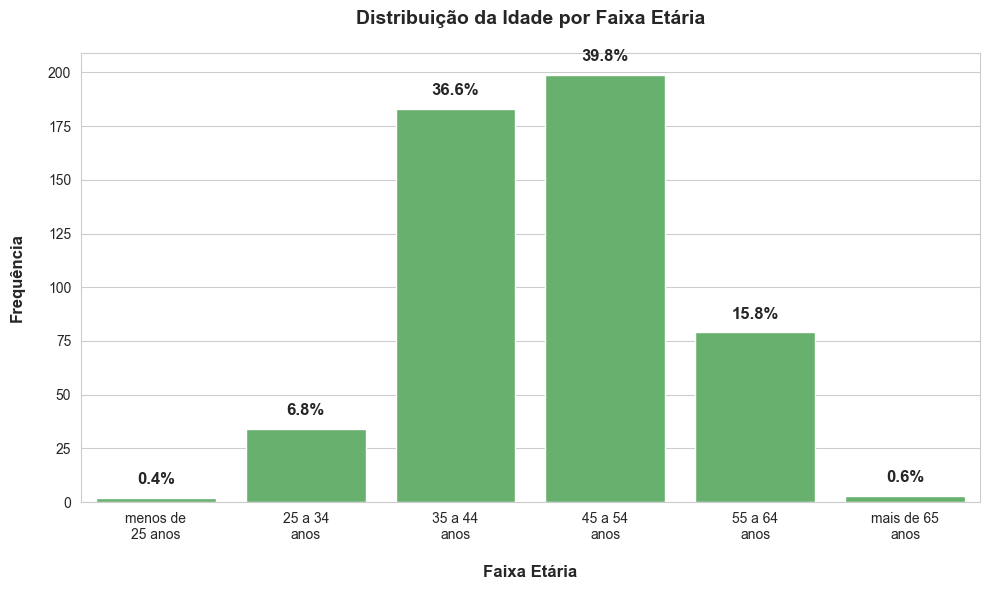

In [22]:
# Conta a frequ√™ncia de cada faixa et√°ria
age_group_counts = df['AGE_GROUP'].value_counts().sort_index()

# Calcula o total para o percentual
total = age_group_counts.sum()

# Converte para DataFrame
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['AGE_GROUP', 'Count']

# Quebra os r√≥tulos longos do eixo X
x_labels = [textwrap.fill(str(label), width=10) for label in age_group_df['AGE_GROUP']]

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cria√ß√£o do barplot
ax = sns.barplot(data=age_group_df, x='AGE_GROUP', y='Count',
                 palette=['#5cbc64'], edgecolor='#fff')

# Aplicar os r√≥tulos com quebra ao eixo X
ax.set_xticklabels(x_labels)

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o da Idade por Faixa Et√°ria\n', fontsize=14, fontweight='bold')
plt.xlabel('\nFaixa Et√°ria', fontsize=12, fontweight='bold')
plt.ylabel('Frequ√™ncia\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(age_group_df['Count']):
    percentage = (count / total) * 100
    ax.text(i, count + total * 0.01, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


O gr√°fico mostra a distribui√ß√£o dos clientes por faixa et√°ria. Observa-se que a maior concentra√ß√£o est√° entre 35 e 54 anos, que juntos representam 76,4% do total da base (36,6% entre 35‚Äì44 anos e 39,8% entre 45‚Äì54 anos).

As faixas 25‚Äì34 anos (6,8%) e 55‚Äì64 anos (15,8%) aparecem em menor propor√ß√£o, enquanto as extremidades, menos de 25 anos (0,4%) e mais de 65 anos (0,6%), s√£o praticamente residuais.

A base de clientes √© fortemente composta por adultos de meia-idade, um p√∫blico geralmente em fase de estabilidade financeira e poder aquisitivo mais elevado, o que pode influenciar diretamente o valor m√©dio de compra de ve√≠culos.

#### 4.1.2. O g√™nero dos clientes est√° balanceado?

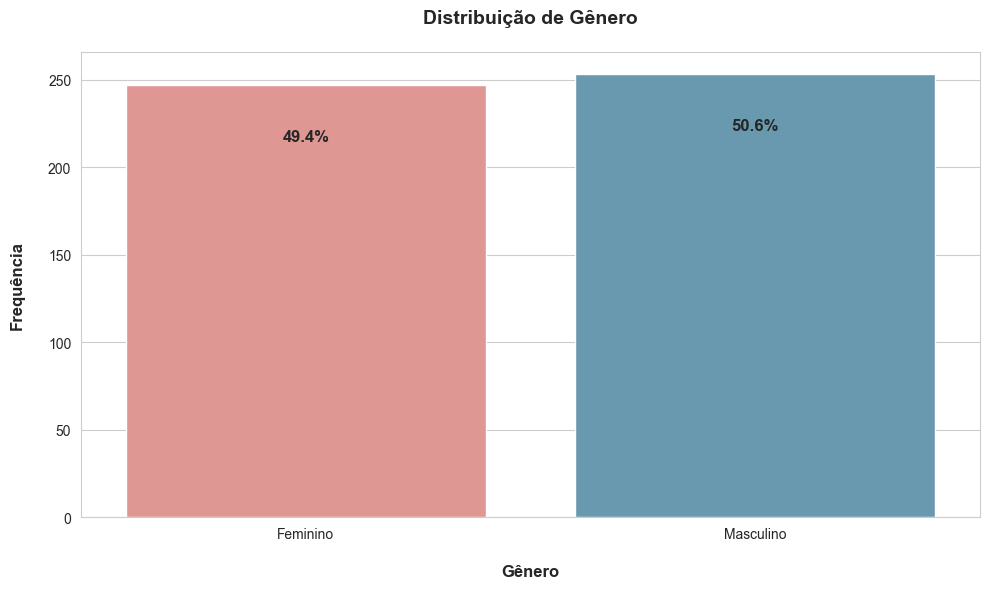

In [23]:
# Conta a frequ√™ncia de cada g√™nero
gender_counts = df['Gender'].value_counts().sort_index()

# Calcula o total para o percentual
total = gender_counts.sum()

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cria√ß√£o do barplot
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values,
    palette=['#ea8c87', '#5d9eba'], edgecolor='#fff'
)

# Alterando os valores do r√≥tulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o de G√™nero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nG√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Frequ√™ncia\n', fontsize=12, fontweight='bold')

# Adicionando os percentuais sobre as barras
for i, count in enumerate(gender_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count - total * 0.05, f'{percentage:.1f}%', 
            ha='center', va='top', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

O gr√°fico mostra uma distribui√ß√£o bastante equilibrada entre os g√™neros:

- Masculino: 50,6%
- Feminino: 49,4%

Essa diferen√ßa de apenas 1,2 ponto percentual indica que o conjunto de dados est√° praticamente balanceado em rela√ß√£o ao g√™nero, esse cen√°rio reduz o risco de vi√©s por predomin√¢ncia de um grupo.

A representatividade equilibrada entre homens e mulheres permite compara√ß√µes justas e an√°lises mais imparciais sobre comportamento de compra, renda e endividamento.

#### 4.1.3. H√° diferen√ßa de idade m√©dia entre g√™neros?

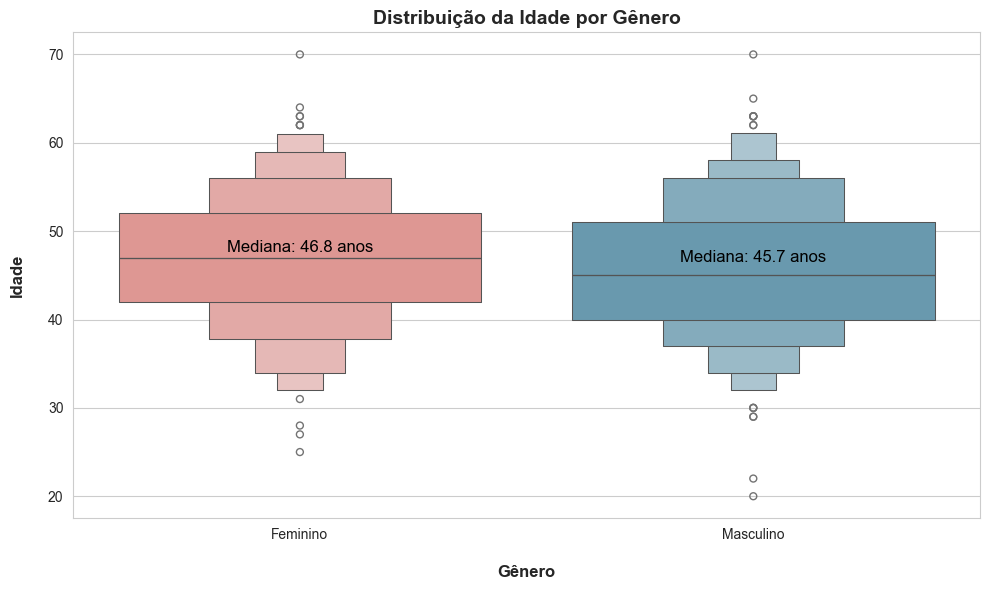

In [ ]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# C√°lculo da m√©dia de idade por g√™nero
media_idade = df.groupby('Gender')['Age'].mean()

# Gr√°fico da idade por g√™nero
ax = sns.boxenplot(data=df, x='Gender', y='Age', palette=['#ea8c87', '#5d9eba'])

# Adiciona anota√ß√µes de m√©dia
for i, gender in enumerate(media_idade.index):
    media = media_idade[gender]
    ax.text(i, media + 0.5, f'M√©dia: {media:.1f} anos', 
            ha='center', va='bottom', fontsize=12, color='#000')

# Alterando os valores dos r√≥tulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o da Idade por G√™nero', fontsize=14, fontweight='bold')
plt.xlabel('\nG√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Idade\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()

O gr√°fico mostra que n√£o h√° diferen√ßa significativa na idade m√©dia entre os g√™neros:

- Feminino: m√©dia de 46,8 anos
- Masculino: m√©dia de 45,7 anos

A diferen√ßa de apenas 1,1 ano √© pequena e indica que homens e mulheres possuem faixas et√°rias bastante semelhantes.

A dispers√£o (amplitude interquartil) √© parecida para ambos os g√™neros, refor√ßando a homogeneidade et√°ria.

Observa-se a presen√ßa de poucos outliers, idades mais extremas, principalmente entre 20 e 70 anos, sem impacto expressivo na m√©dia geral.

De modo geral, a idade m√©dia dos clientes √© praticamente equilibrada entre os g√™neros, o que reduz o risco de vi√©s et√°rio em an√°lises comparativas, como comportamento de compra ou renda.

#### 4.1.4. O valor m√©dio de compra difere entre g√™neros?

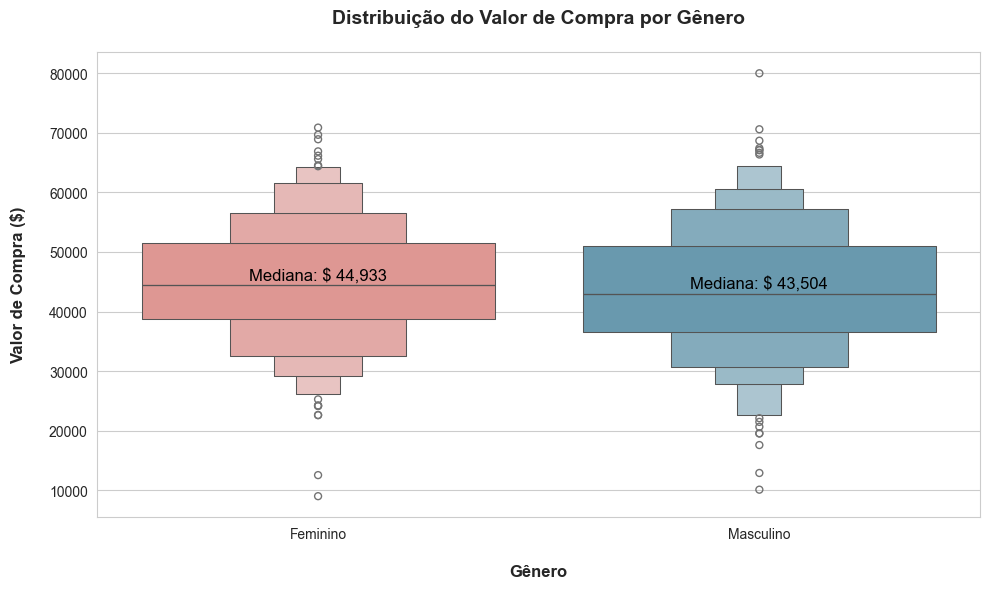

In [ ]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# C√°lculo da m√©dia de compra por g√™nero
media_compra = df.groupby('Gender')['Car Purchase Amount'].mean()

# Gr√°fico do valor de compra por g√™nero
ax = sns.boxenplot(data=df, x='Gender', y='Car Purchase Amount', 
                   palette=['#ea8c87', '#5d9eba'])

# Adiciona anota√ß√µes de m√©dia
for i, gender in enumerate(media_compra.index):
    media = media_compra[gender]
    ax.text(i, media + 0.5, f'M√©dia: $ {media:,.0f}', 
            ha='center', va='bottom', fontsize=12, color='#000')

# Alterando os valores dos r√≥tulos
ax.set_xticks([0, 1])
ax.set_xticklabels(['Feminino', 'Masculino'])

# T√≠tulo e r√≥tulos
plt.title('Distribui√ß√£o do Valor de Compra por G√™nero\n', fontsize=14, fontweight='bold')
plt.xlabel('\nG√™nero', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


O gr√°fico indica que n√£o h√° diferen√ßa relevante no valor m√©dio de compra entre os g√™neros:

- Feminino: m√©dia de aproximadamente $44.933
- Masculino: m√©dia de aproximadamente $43.504

A diferen√ßa de cerca de $1.400 √© pequena, sugerindo que homens e mulheres apresentam comportamentos de compra semelhantes em rela√ß√£o ao valor gasto na aquisi√ß√£o de autom√≥veis.

A dispers√£o dos valores √© parecida entre os grupos, com faixas principais entre $30.000 e $60.000.

Observa-se a presen√ßa de outliers em ambos os g√™neros, valores acima de $70.000 e abaixo de $20.000, o que indica clientes com padr√µes de compra mais at√≠picos.

A m√©dia pr√≥xima entre os grupos refor√ßa a aus√™ncia de vi√©s de g√™nero no valor gasto. Assim, o g√™nero n√£o parece exercer influ√™ncia significativa sobre o valor m√©dio de compra, sendo prov√°vel que outras vari√°veis, como renda anual, patrim√¥nio l√≠quido e n√≠vel de d√≠vida, expliquem melhor as varia√ß√µes no valor investido na compra do autom√≥vel.

#### 4.1.5. Idade influencia o valor do carro comprado?

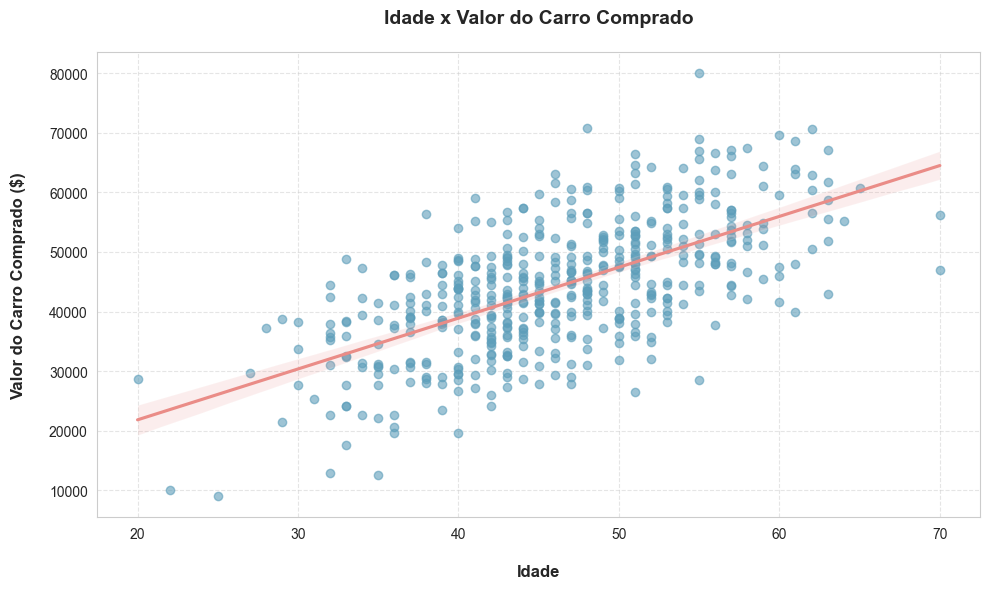

In [26]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gr√°fico do valor de compra por idade
sns.regplot(data=df, x='Age', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# T√≠tulos e r√≥tulos
plt.title('Idade x Valor do Carro Comprado\n', fontsize=14, fontweight='bold')
plt.xlabel('\nIdade', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Carro Comprado ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()


O gr√°fico de dispers√£o com linha de regress√£o indica uma rela√ß√£o positiva moderada entre idade e valor do carro comprado.
Em termos gerais, clientes mais velhos tendem a comprar carros de maior valor, enquanto os mais jovens adquirem ve√≠culos mais baratos.

A tend√™ncia √© claramente ascendente, sugerindo que √† medida que a idade aumenta, o poder aquisitivo tamb√©m cresce, refletindo em compras de maior valor.

A √°rea sombreada ao redor da linha (intervalo de confian√ßa) √© relativamente estreita, refor√ßando a consist√™ncia da tend√™ncia observada.

H√° correla√ß√£o positiva entre idade e valor do carro comprado, o que sugere que a idade √© um fator preditivo relevante para o valor de compra, provavelmente associada ao aumento de estabilidade financeira e renda ao longo da vida.

#### 4.1.6. Existe uma faixa et√°ria que tende a gastar mais?

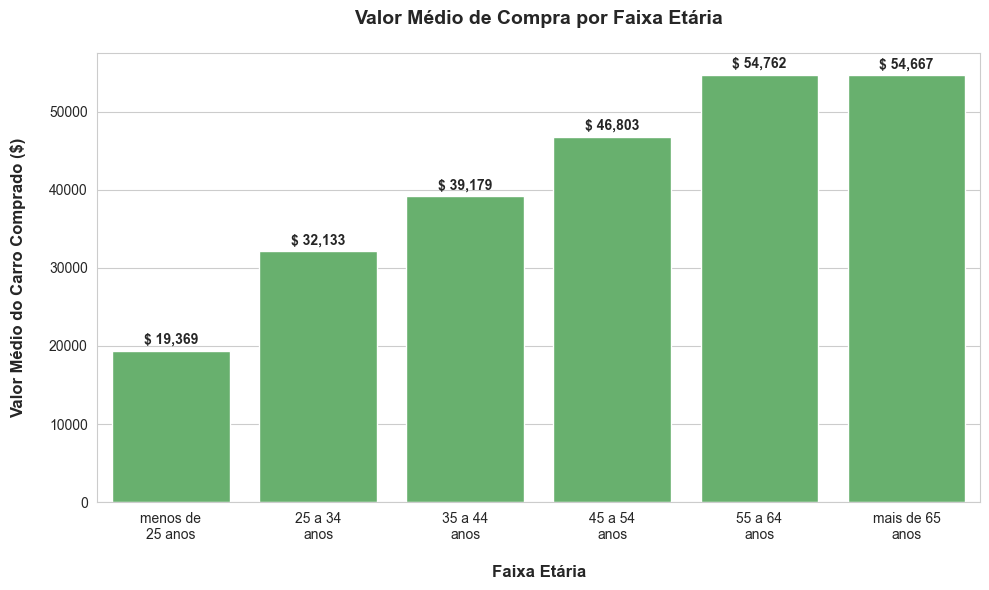

In [ ]:
# Calcular valor m√©dio de compra por faixa et√°ria
age_group_avg = df.groupby('AGE_GROUP')['Car Purchase Amount'].mean().reset_index()

# Usa textwrap para quebrar automaticamente os r√≥tulos longos do eixo x
x_labels = [textwrap.fill(str(label), width=10) for label in age_group_avg['AGE_GROUP']]

# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cria√ß√£o do barplot
ax = sns.barplot(data=age_group_avg, x='AGE_GROUP', y='Car Purchase Amount',
                 palette=['#5cbc64'], edgecolor='#fff')

# Aplicar os r√≥tulos com quebra ao eixo X
ax.set_xticklabels(x_labels)

# T√≠tulo e r√≥tulos
plt.title('Valor M√©dio de Compra por Faixa Et√°ria\n', fontsize=14, fontweight='bold')
plt.xlabel('\nFaixa Et√°ria', fontsize=12, fontweight='bold')
plt.ylabel('Valor M√©dio do Carro Comprado ($)\n', fontsize=12, fontweight='bold')

# Adicionar valores nas barras
for index, row in age_group_avg.iterrows():
    plt.text(index, row['Car Purchase Amount'] + 500,
             f'$ {row["Car Purchase Amount"]:,.0f}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Layout final
plt.tight_layout()
plt.show()


De acordo com o gr√°fico, as faixas et√°rias que tendem a gastar mais na compra de carros s√£o as de 55 a 64 anos e a de mais de 65 anos, com valores m√©dios de compra muito pr√≥ximos, cerca de US$ 54.762 e US$ 54.667, respectivamente.

Isso indica que os consumidores mais velhos investem em carros de maior valor, possivelmente por apresentarem maior estabilidade financeira ou prefer√™ncia por ve√≠culos mais confort√°veis e sofisticados.

Em contraste, o grupo com menos de 25 anos √© o que menos gasta, com valor m√©dio de apenas US$ 19.369, o que reflete menor poder aquisitivo ou prioridade em ve√≠culos mais econ√¥micos.

### 4.2. An√°lise financeira

#### 4.2.1. Como √© a distribui√ß√£o da renda anual?

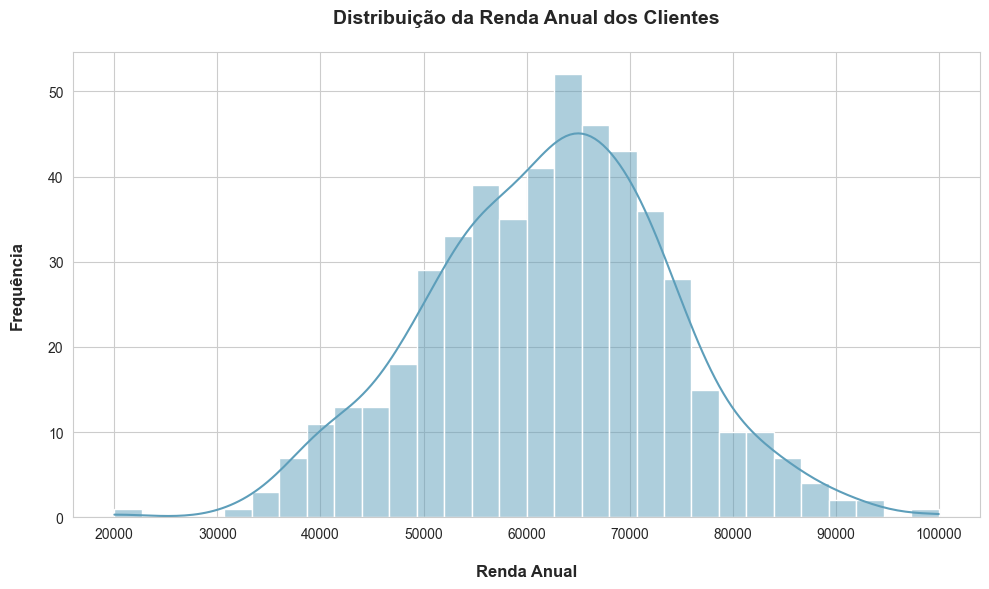

In [28]:
# Ajuste de tamanho da figura
plt.figure(figsize=(10, 6))

# Histograma com KDE
sns.histplot(data=df, x='Annual Salary', bins=30, kde=True, 
             color='#5d9eba', edgecolor='#ffffff')

# T√≠tulo e labels
plt.title('Distribui√ß√£o da Renda Anual dos Clientes\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nRenda Anual', fontsize=12, fontweight='bold')
plt.ylabel('Frequ√™ncia\n', fontsize=12, fontweight='bold')

# Exibe o gr√°fico
plt.tight_layout()
plt.show()

A distribui√ß√£o da renda anual dos clientes apresentada no gr√°fico √© aproximadamente normal, com uma leve assimetria.

A maior concentra√ß√£o de clientes possui renda entre US$ 55.000 e US$ 73.000.

Poucos clientes t√™m renda abaixo de US$ 40.000 ou acima de US$ 90.000.

Isso indica que a maioria dos clientes est√° dentro de uma faixa de renda m√©dia, com poucos casos extremos de renda muito alta ou muito baixa.

Em resumo, trata-se de uma popula√ß√£o relativamente homog√™nea em termos de renda, com tend√™ncia central bem definida e distribui√ß√£o levemente inclinada para rendas mais altas.

#### 4.2.2. Qual a rela√ß√£o de entre renda e valor de compra?

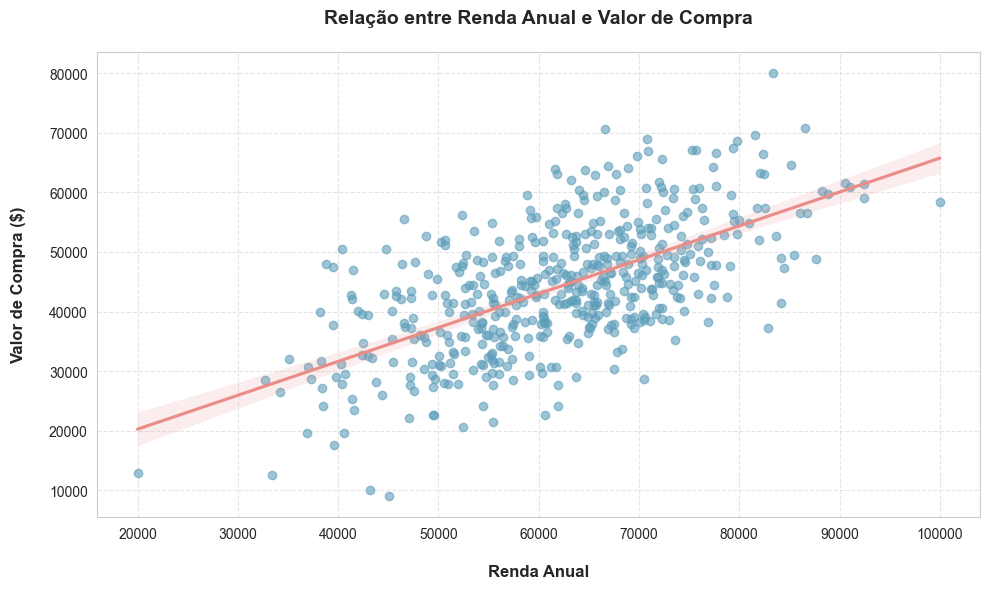

In [29]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gr√°fico do valor de compra por renda anual
sns.regplot(data=df, x='Annual Salary', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# T√≠tulos e r√≥tulos
plt.title('Rela√ß√£o entre Renda Anual e Valor de Compra\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nRenda Anual', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()

O gr√°fico mostra uma correla√ß√£o positiva entre renda anual e valor de compra.

√Ä medida que a renda anual aumenta, o valor gasto na compra do carro tamb√©m tende a subir.
Isso indica que clientes com maior poder aquisitivo compram carros de maior valor.

A linha de regress√£o tem inclina√ß√£o positiva, confirmando essa tend√™ncia.

Apesar da dispers√£o, ou seja, clientes com mesma renda comprando carros de valores diferentes, a tend√™ncia geral √© clara, renda mais alta compra mais cara.

O intervalo sombreado mostra o n√≠vel de confian√ßa, refor√ßando que a rela√ß√£o √© consistente.

Existe uma rela√ß√£o linear positiva moderada entre renda e valor de compra, o que pode ajudar a prever faixas de gasto com base na renda.

#### 4.2.3. Clientes com mais d√≠vida compram carros mais caros?

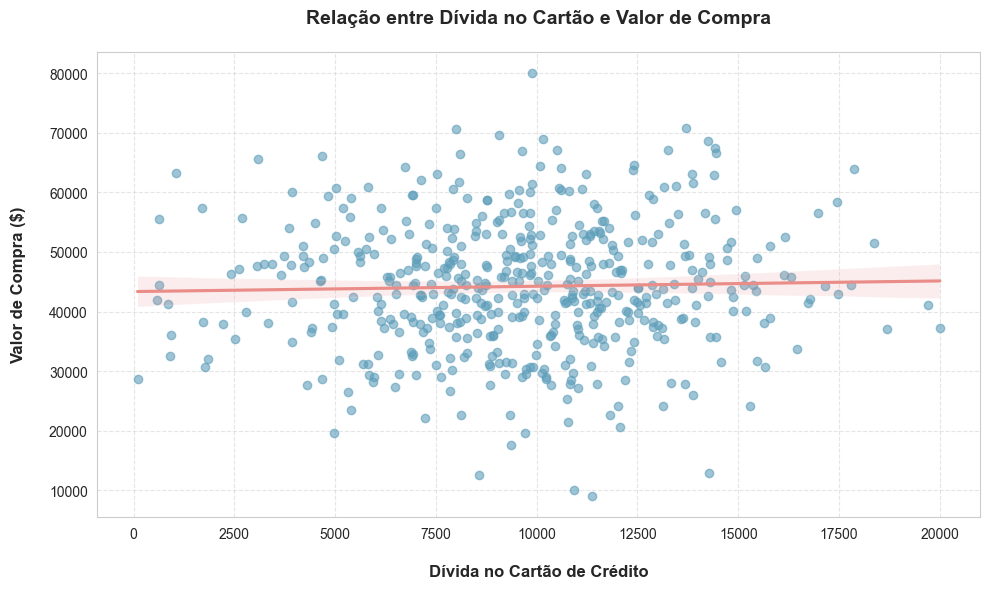

In [30]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gr√°fico do valor de compra por d√≠vida no cart√£o de cr√©dito
sns.regplot(data=df, x='Credit Card Debt', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# T√≠tulos e r√≥tulos
plt.title('Rela√ß√£o entre D√≠vida no Cart√£o e Valor de Compra\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nD√≠vida no Cart√£o de Cr√©dito', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Layout final
plt.tight_layout()
plt.show()

O gr√°fico indica que n√£o h√° rela√ß√£o significativa entre o valor da d√≠vida no cart√£o de cr√©dito e o valor de compra do carro.

A linha de regress√£o √© praticamente horizontal, mostrando correla√ß√£o pr√≥xima de zero.

Isso significa que clientes com d√≠vidas maiores n√£o necessariamente compram carros mais caros e vice-versa.

A dispers√£o ampla dos pontos refor√ßa que o comportamento de compra √© independente do n√≠vel de endividamento no cart√£o.

N√£o existe uma tend√™ncia clara de que maior d√≠vida leve a compras de maior valor. O valor gasto na compra do carro parece estar mais relacionado a outros fatores, como renda anual ou faixa et√°ria, do que √† d√≠vida no cart√£o de cr√©dito.

#### 4.2.4. O patrim√¥nio l√≠quido tem rela√ß√£o com o valor de compra?

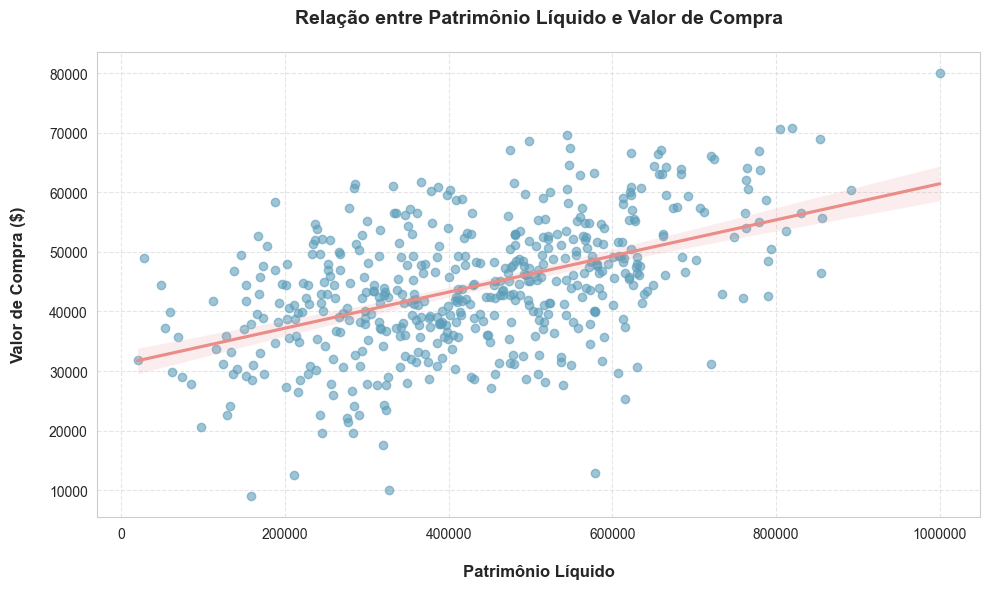

In [31]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Gr√°fico do valor de compra por patrim√¥nio l√≠quido
sns.regplot(data=df, x='Net Worth', y='Car Purchase Amount',
    scatter_kws={'alpha': 0.6, 'color': '#5d9eba'}, line_kws={'color': '#ea8c87'})

# T√≠tulos e r√≥tulos
plt.title('Rela√ß√£o entre Patrim√¥nio L√≠quido e Valor de Compra\n', 
          fontsize=14, fontweight='bold')
plt.xlabel('\nPatrim√¥nio L√≠quido', fontsize=12, fontweight='bold')
plt.ylabel('Valor de Compra ($)\n', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

# Exibe r√≥tulos sem nota√ß√£o cient√≠fica
plt.ticklabel_format(style='plain', axis='x')

# Layout final
plt.tight_layout()
plt.show()


#### 4.2.5. Renda, d√≠vida e patrim√¥nio s√£o correlacionados entre si?

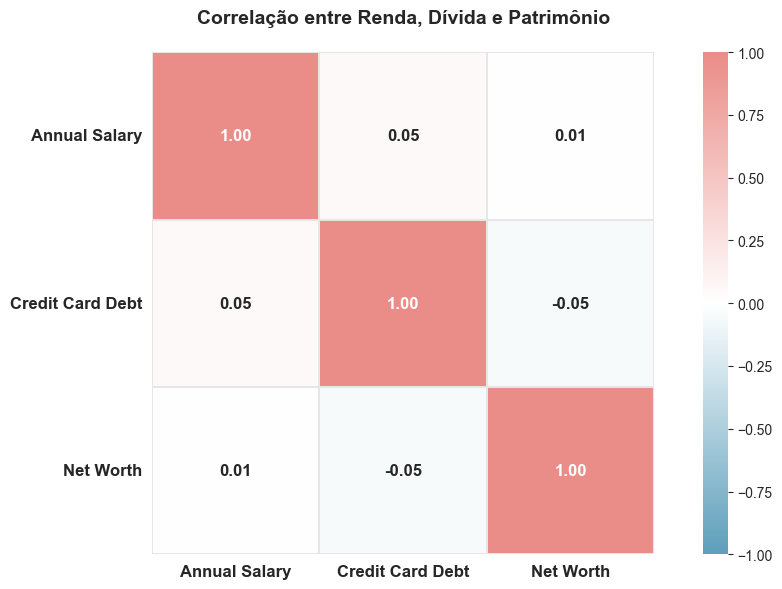

In [32]:
# Selecionar apenas as vari√°veis financeiras
finance_cols = ['Annual Salary', 'Credit Card Debt', 'Net Worth']

# Calcular correla√ß√£o
corr_matrix = df[finance_cols].corr()

# Criar colormap personalizado
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['#5d9eba','#ffffff', '#ea8c87'])

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True,  annot_kws={'size': 12, 'fontweight': 'bold'},
            linewidths=.1, linecolor='#e6e6e6', fmt='.2f', 
            cmap=custom_cmap, square=True, vmin=-1, vmax=1)

# T√≠tulos e r√≥tulos
plt.title('Correla√ß√£o entre Renda, D√≠vida e Patrim√¥nio\n',
          fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)

# Layout final
plt.tight_layout()
plt.show()


#### 4.2.6. Quais vari√°veis t√™m maior correla√ß√£o com o valor de compra?

In [33]:
# Selecionar apenas colunas num√©ricas
numeric_cols = df.select_dtypes(include=['int', 'float'])

# Calcular correla√ß√£o com o target
correlation = numeric_cols.corr()['Car Purchase Amount'].drop('Car Purchase Amount').sort_values(ascending=False)

# Exibir como tabela
print('\nCorrela√ß√£o com \'Car Purchase Amount\':\n')
for idx, val in correlation.items():
    print(f'{idx:<20} {val:.4f}')


Correla√ß√£o com 'Car Purchase Amount':

Age                  0.6333
Annual Salary        0.6179
Net Worth            0.4886
Credit Card Debt     0.0289
Gender               -0.0664


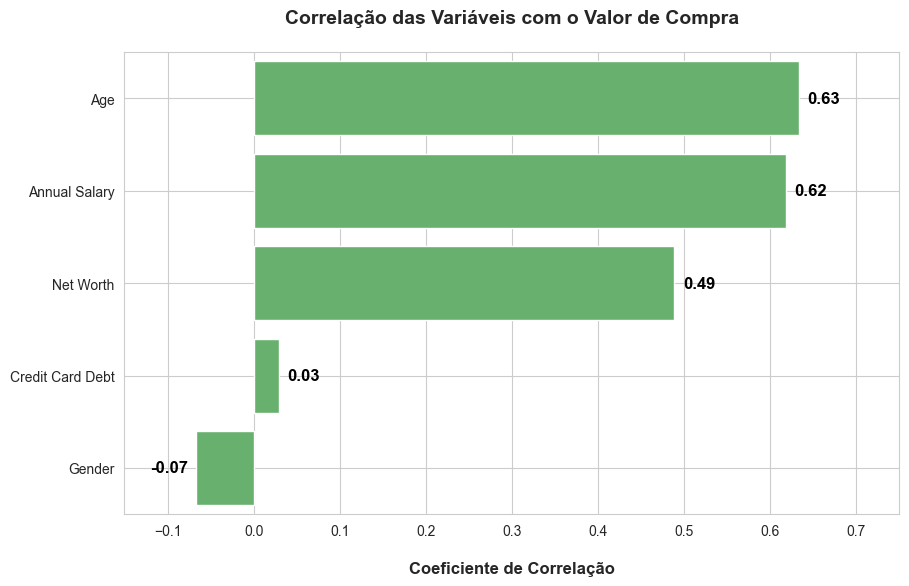

In [34]:
# Ajuste do tamanho da figura
plt.figure(figsize=(10, 6))

# Cria√ß√£o do barplot
ax = sns.barplot(x=correlation.values, y=correlation.index, palette=['#5cbc64'])

# T√≠tulo e r√≥tulos
plt.title('Correla√ß√£o das Vari√°veis com o Valor de Compra\n', fontsize=14, fontweight='bold')
plt.xlabel('\nCoeficiente de Correla√ß√£o', fontsize=12, fontweight='bold')
plt.ylabel('', fontsize=12, fontweight='bold')

# Definir limites do eixo x
plt.xlim(-0.15, 0.75)

# Incluir os valores dentro das barras com dist√¢ncia ajustada
for i, (value, name) in enumerate(zip(correlation.values, correlation.index)):
    offset = 0.01 if value > 0 else -0.01  # Define a dist√¢ncia do texto
    align = 'left' if value > 0 else 'right'
    ax.text(value + offset, i, f'{value:.2f}', va='center', ha=align, 
            fontsize=12, color='black', weight='bold')

# Layout final
plt.grid(True)
plt.show()

## 5. Insights e recomenda√ß√µes